# Tutorial 1
### Creating `Epochs` from `MNE.Epochs`

In [1]:
import epoch_tools as et
import mne

Load an `MNE.Epochs` file

In [2]:
mne_epochs = mne.read_epochs('./tutorials/test_data/mne_epochs-epo.fif')

Reading d:\RA\custom_libs\epoch_tools\tutorials\test_data\mne_epochs-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    4999.45 ms
        0 CTF compensation matrices available
Adding metadata with 257 columns
3953 matching events found
No baseline correction applied
0 projection items activated


In [3]:
mne_epochs.metadata.columns

Index(['og_id', 'animal_id', 'genotype', 'batch', 'start_sample', 'end_sample',
       'start_frame', 'end_frame', 'ploss_ratio', 'bad',
       ...
       'STR_R_theta_delta_ratio', 'STR_R_band3', 'STR_R_band4', 'STR_R_band5',
       'STR_R_band6', 'STR_R_band7', 'STR_R_band8', 'STR_R_band9',
       'STR_R_band10', 'STR_R_entropy'],
      dtype='object', length=257)

In [4]:
# By checking the columns of the metadata, we can see which columns are not feature columns
# These should be specified in the non_feature_columns list when initializing the Epochs object
non_feature_columns = ['og_id', 'animal_id', 'genotype', 'batch', 'start_sample', 'end_sample',
    'start_frame', 'end_frame', 'ploss_ratio', 'bad', 'nose_max_speed',
    'center_max_speed', 'tail_max_speed', 'transmitter_max_speed']

# (Optional) specifiy subject/animal_id or condition
animal_id = "78227"
condition = "KO"

# Initialize the Epochs object
epochs = et.Epochs(mne_epochs, non_feature_columns, animal_id, condition)
epochs

Number of events,3953
Events,1: 3953
Time range,0.000 – 4.999 sec
Baseline,off


Slicing the epochs to create a subset (e.g. select good quality epochs)

In [5]:
epochs.metadata

,og_id,animal_id,genotype,batch,start_sample,end_sample,start_frame,end_frame,ploss_ratio,bad,...,STR_R_theta_delta_ratio,STR_R_band3,STR_R_band4,STR_R_band5,STR_R_band6,STR_R_band7,STR_R_band8,STR_R_band9,STR_R_band10,STR_R_entropy
0,0,78227,DRD2-KO,1,0,5424,NaN,NaN,0.125553,True,...,-3.671855,-76.022199,-76.380842,-77.033404,-77.639722,-78.076580,-80.472494,-83.480270,-87.111698,6.685264
1,1,78227,DRD2-KO,1,5423,10847,NaN,NaN,0.035398,False,...,-1.566831,-74.436088,-74.446885,-76.265476,-77.416146,-76.580511,-79.001190,-82.799705,-85.434975,6.891241
2,2,78227,DRD2-KO,1,10847,16271,27.0,177.0,0.080199,True,...,-1.688646,-75.709092,-76.392308,-76.521617,-76.684393,-74.008316,-77.967033,-82.933691,-86.634952,6.789211
3,3,78227,DRD2-KO,1,16270,21694,177.0,327.0,0.184919,True,...,-5.052712,-75.771157,-76.000293,-77.642635,-77.063219,-77.272807,-80.399597,-84.283892,-88.449659,6.657281
4,4,78227,DRD2-KO,1,21694,27118,327.0,477.0,0.000000,False,...,-2.785029,-76.185790,-75.613225,-77.029736,-77.206400,-74.091209,-77.629490,-82.676076,-86.040880,7.039608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,3948,78227,DRD2-KO,1,21412354,21417778,591267.0,591417.0,0.073562,True,...,-0.176983,-75.383986,-77.968813,-77.435295,-76.493195,-77.603228,-79.950196,-82.921342,-85.660535,6.436666
3949,3949,78227,DRD2-KO,1,21417777,21423201,591417.0,591567.0,0.000000,False,...,2.260253,-75.599230,-78.056863,-77.470832,-76.689513,-76.460811,-79.446343,-81.905339,-85.635872,6.421256
3950,3950,78227,DRD2-KO,1,21423201,21428625,NaN,NaN,0.000000,False,...,1.425963,-75.639634,-77.604950,-77.026924,-75.585117,-76.290952,-78.869302,-83.225233,-85.964341,6.664222
3951,3951,78227,DRD2-KO,1,21428624,21434048,NaN,NaN,0.000000,False,...,1.732503,-75.078273,-76.659801,-77.507717,-76.433494,-76.792611,-79.949486,-82.885804,-87.255492,6.610834


In [6]:
subset = epochs[epochs.metadata['ploss_ratio']<0.1] # Less than 10% of the samples are lost
subset = subset[subset.metadata['transmitter_max_speed']<3] # Speed less than 3 cm/s, for immobility epochs

subset

Number of events,152
Events,1: 152
Time range,0.000 – 4.999 sec
Baseline,off


### Various plotting options available

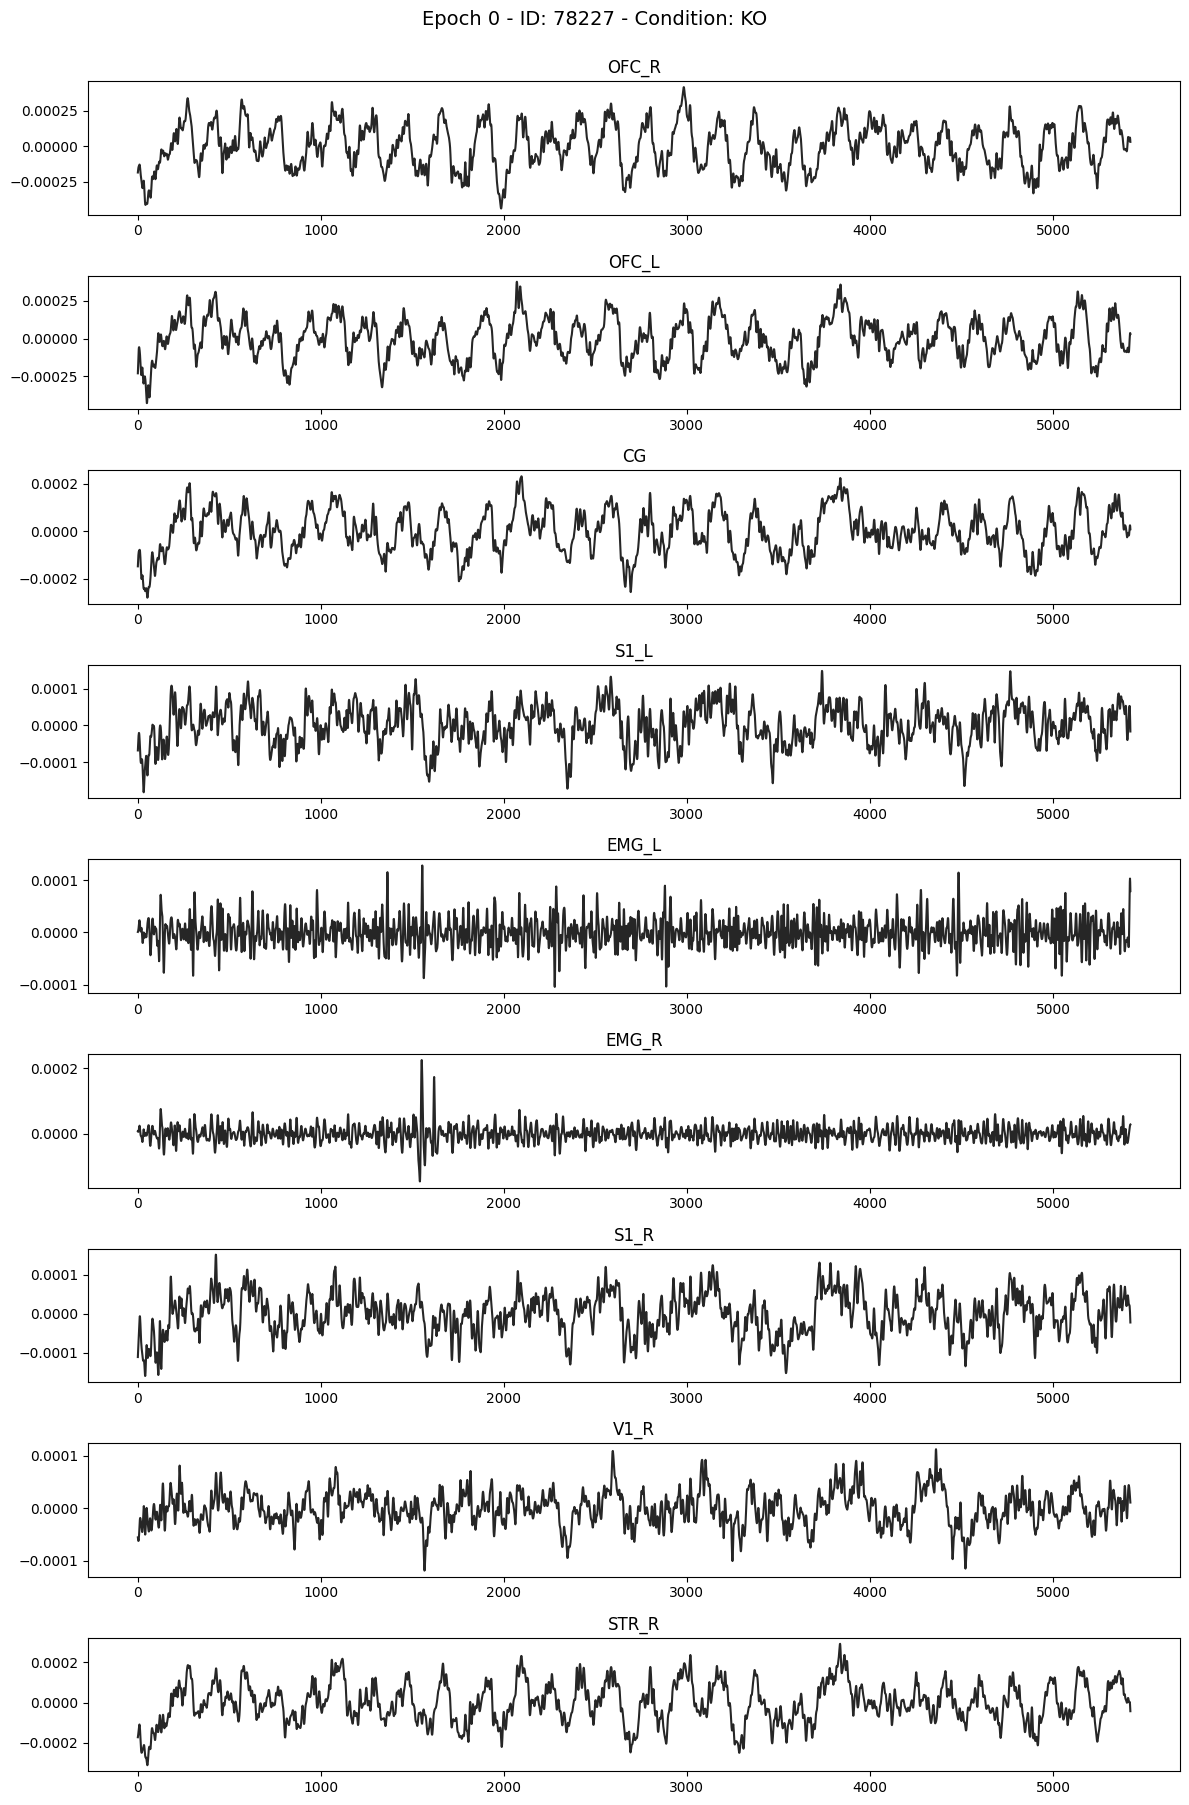

In [7]:
subset.plot_epoch(idx=0) # specify the index of the epoch to plot

# or plot a random epoch
# subset.plot_epoch()

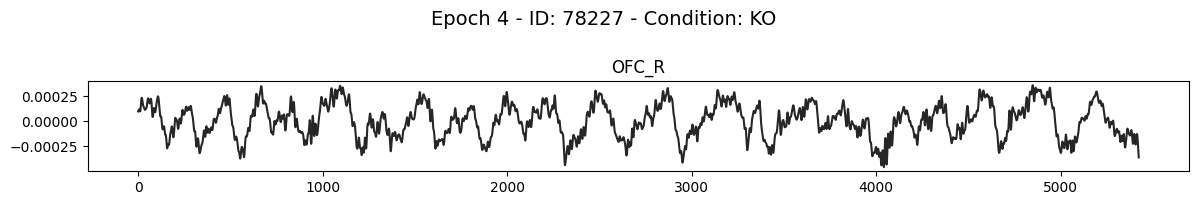

In [8]:
# Or plot a specific channel
subset.plot_epoch(idx=4, channels=['OFC_R'])

    Using multitaper spectrum estimation with 7 DPSS windows


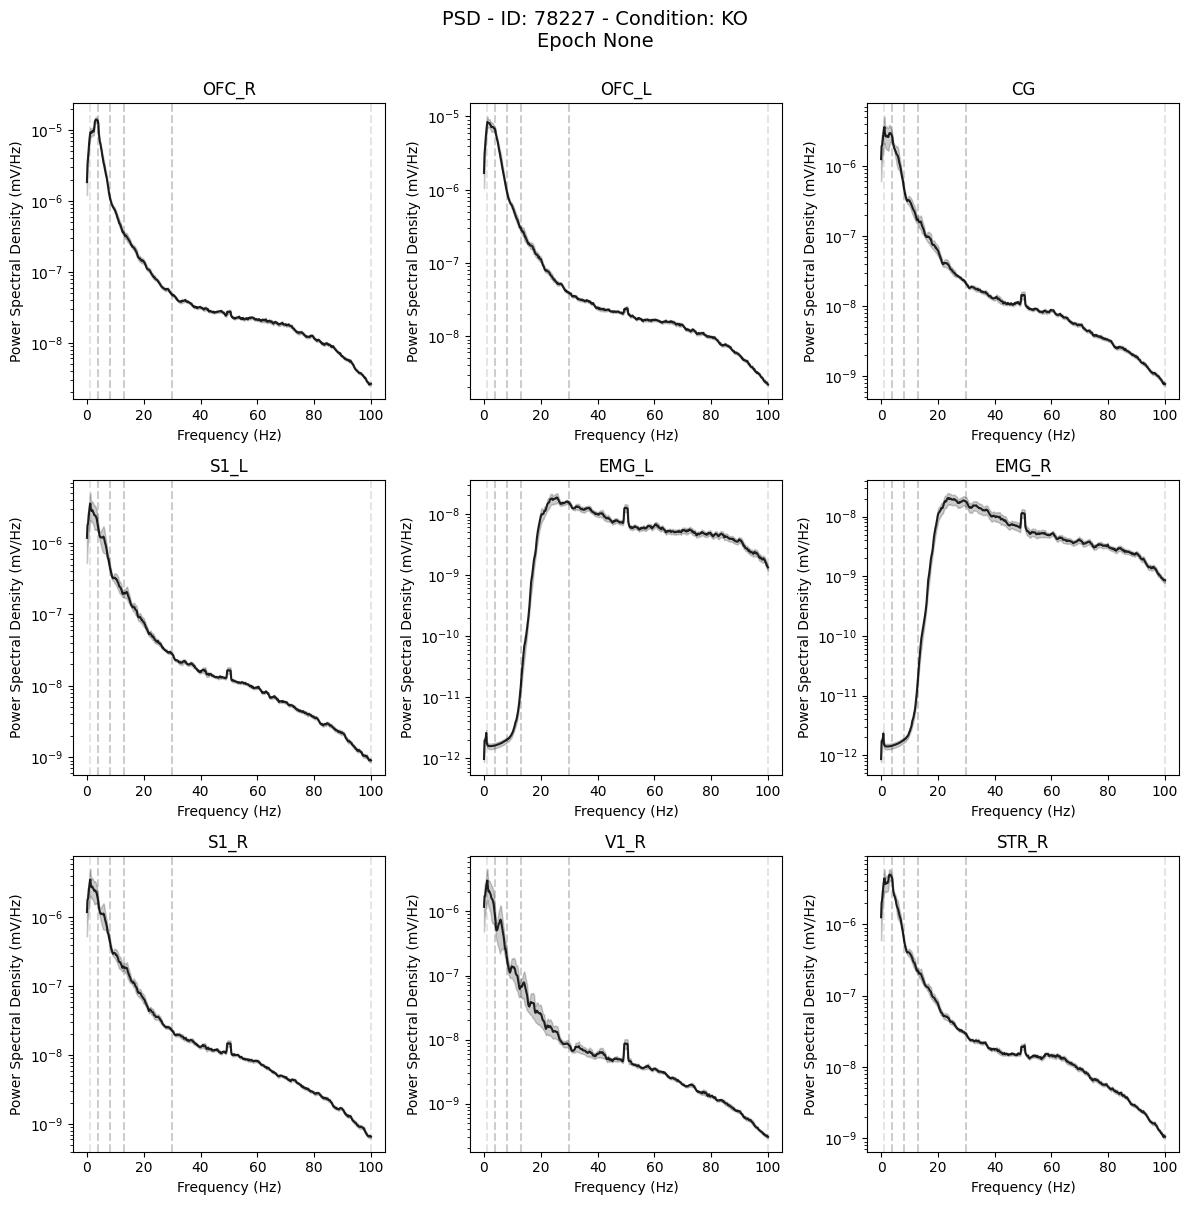

In [9]:
# Plotting PSD
# There are two options here, one from MNE(epochs.plot_psd()) and 
# one from the epoch_tools object itself (epochs.plot_psd_())

subset.plot_psd_(channels='all', fmin=0, fmax=100, 
                log=True, norm=False, err_method='sem', epoch_idx = None)
# specify the index of the epoch to plot, or leave it as None to plot all epochs

    Using multitaper spectrum estimation with 7 DPSS windows


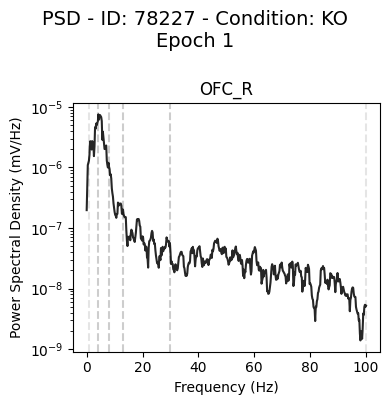

In [10]:
# specify the index of the epoch to plot, or leave it as None to plot all epochs
subset.plot_psd_(err_method='ci', channels=['OFC_R'], epoch_idx=1)

## Clustering

First in case we don't want to use all the features that are available (e.g. only a few channels or avoid redundancy), we can create a feature subset.

Calling `create_feature_subset()`, opens an interactive selection menu to select (multiple while holding Ctrl) features. You can also provide a list of all features to include by passing it in the "features" argument.

In [11]:
channels_to_include = ['OFC_L', 'EMG_L']

subset.create_feature_subset(ch_names=channels_to_include)

SelectMultiple(description='Feature Names', layout=Layout(height='200px', width='80%'), options=('OFC_L_mean',…

Button(description='Select Feature Subset', style=ButtonStyle())

Feature Subset Set
('OFC_L_delta', 'OFC_L_theta', 'OFC_L_alpha', 'OFC_L_beta', 'OFC_L_gamma', 'OFC_L_theta_delta_ratio', 'EMG_L_zero_crossing_rate', 'EMG_L_gamma', 'EMG_L_entropy')


In [12]:
print(subset.features_subset)

['OFC_L_delta', 'OFC_L_theta', 'OFC_L_alpha', 'OFC_L_beta', 'OFC_L_gamma', 'OFC_L_theta_delta_ratio', 'EMG_L_zero_crossing_rate', 'EMG_L_gamma', 'EMG_L_entropy']


We can then get the features by calling `get_features()`. This scales and cleans the features from the Epochs metadata and stores them locally. All downstream analysis is done to whatever features are scaled here

In [13]:
feats = subset.get_features(
    scaler='standard',
    dropna=True,
    ch_names={'OFC_L': 'OFC',
              'EMG_L': 'EMG'}, # This is to "clean" the naming and avoid the L/R suffix in
    as_array=False
)
feats

,OFC_delta,OFC_theta,OFC_alpha,OFC_beta,OFC_gamma,OFC_theta_delta_ratio,EMG_zero_crossing_rate,EMG_gamma,EMG_entropy
0,-1.097344,0.143853,-1.166105,-0.957133,-0.425706,1.719893,1.250307,0.832633,0.939668
1,-0.450094,0.336481,-0.315946,-0.420089,0.452012,0.995810,1.507229,0.770378,1.142455
2,-0.086259,-0.003504,-0.181330,-0.659685,-0.268476,0.119696,1.386325,0.565449,1.201304
3,-0.162399,0.546143,-0.322966,-0.706259,0.619099,0.803767,1.129403,0.173309,0.995157
4,-0.487891,-0.214930,-0.112697,-0.724976,0.107598,0.472839,1.522342,1.842553,1.274667
...,...,...,...,...,...,...,...,...,...
147,-1.224718,0.042330,-0.518994,-0.395286,-0.658673,1.795816,1.280533,2.093631,1.128635
148,-0.341045,0.183913,-0.083835,-0.702563,0.831614,0.680198,1.325873,2.413302,1.168528
149,-0.113813,0.346524,-0.555013,-0.102320,0.088850,0.525390,1.356099,1.677949,0.929279
150,-0.335861,0.062770,-0.074696,-0.499762,0.291299,0.546015,1.204968,1.830511,1.182800


## Saving `Epochs`

In this stage we will save the `Epochs` so that it can be used in the rest of the tutorials. This is of course optional, and you can proceed with clustering here.

Saving `Epochs` currently saves 2 files, one is and MNE .fif and the other is a .pickle with the rest of the class attributes. This is temporary until a method is found to combine them both in two while retaining MNE's compression 

In [17]:
subset.save_epochs("./tutorials/test_data/tutorial1_Epochs-taini-epo.pkl", overwrite=True)

Overwriting existing file.
